<a href="https://colab.research.google.com/github/xkrishnam/notebooks/blob/main/descision_tree_regression_on_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision tree regression with PCA for housing data

In [50]:
import numpy as np
import pandas as pd

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("sample_data/california_housing_train.csv") # read training data
htrain_x_df = df.drop("median_house_value" ,axis = 1)
htrain_y = df["median_house_value"].copy()
#prepare training data
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 ('pca-reduce', PCA(n_components=7))
 ])
htrain_x = num_pipeline.fit_transform(htrain_x_df)

print("train X shape {} and training label shape {}".format(htrain_x.shape,htrain_y.shape))

train X shape (17000, 7) and training label shape (17000,)


In [52]:
# Load and prepare test data
df = pd.read_csv("sample_data/california_housing_test.csv") # read training data
htest_x_df = df.drop("median_house_value" ,axis = 1)
htest_y = df["median_house_value"].copy()
htest_x = num_pipeline.fit_transform(htest_x_df)
print("test data shape {} and test label shape {}".format(htest_x.shape,htest_y.shape))

test data shape (3000, 7) and test label shape (3000,)


# **Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(htrain_x , htrain_y)

# errorcalc on test data
housing_predictions = tree_reg.predict(htest_x)
tree_mse = mean_squared_error(htest_y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

124034.41950304896

In [54]:
def display_scores (scores):
    print("Scores:", scores)
    print("\n Mean:", scores.mean())
    print("\n Standard deviation:", scores.std(),"\n")
    


from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg  , htest_x  , htest_y , scoring="neg_mean_squared_error"  , cv = 10 )
tree_rmse_scores  = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [79019.8666836  88695.00980356 96497.21361112 95188.04288029
 82411.2128053  81432.85872447 82360.97355793 91637.47682426
 93059.97279919 74342.15977524]

 Mean: 86464.47874649534

 Standard deviation: 7162.051699375182 



In [55]:
from sklearn import tree

[Text(0.5, 0.875, 'X[2] <= 0.961\nsquared_error = 13451442293.569\nsamples = 17000\nvalue = 207300.912'),
 Text(0.25, 0.625, 'X[5] <= 0.055\nsquared_error = 9835257604.811\nsamples = 14418\nvalue = 184226.812'),
 Text(0.125, 0.375, 'X[3] <= 0.574\nsquared_error = 9884295099.644\nsamples = 8622\nvalue = 216122.088'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[3] <= 1.234\nsquared_error = 5997795556.212\nsamples = 5796\nvalue = 136780.111'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[3] <= 0.437\nsquared_error = 14069858221.335\nsamples = 2582\nvalue = 336147.692'),
 Text(0.625, 0.375, 'X[2] <= 2.048\nsquared_error = 9643501662.388\nsamples = 1674\nvalue = 282528.369'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[3] <= 1.122\nsquared_error = 7157935627.372\nsamples = 908\nvalue = 435000.937'),
 Text(0.8125, 0.125, '\n 

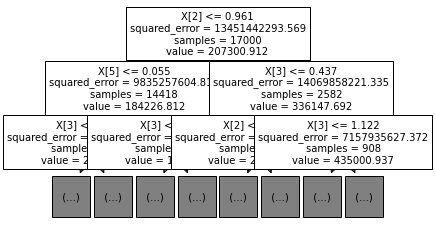

In [56]:
tree.plot_tree(tree_reg, max_depth=2,fontsize=10)